# GFER Lycopene Analysis - 48h
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [3]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [4]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [5]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [6]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


## Runinng CellDoctor

In [7]:
# Define the protocol

channel_map = {"DAPI - DAPI": "NucliChannel",
               "Cy3 - Cy3": ["SemiCytoChannel", "ActinChannel"],
               "Cy5 - Cy5": "MitoTrackerChannel",
               "FITC - FITC": "GferChannel",
               "DataExtractors": [{"class": "NucliDataExtractor", "data_sources": ["Nucli"],
                       "trigger_after": "Nucli"},
                      {"class": "NucliCytoDataExtractor", "data_sources": ["Nucli", "Cyto"],
                       "trigger_after": "Nucli"},
                      {"class": "SemiCytoImageUnification", "data_sources": ["Cyto", "Nucli", "GFER", "MitoTracker"],
                       "trigger_after": "Nucli"},
                      {"class": "CytoDataExtractor", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"},
                      {"class": "MitoTrackerDataExtractor", "data_sources": ["MitoTracker"],
                       "trigger_after": "MitoTracker"},                                 
                      {"class": "AntiBodyDataExtractor", "data_sources": ["GFER"],
                       "trigger_after": "GFER"},
                      {"class": "AntiBodyDataExtractor", "data_sources": ["Actin"],
                       "trigger_after": "Actin"},
                      {"class": "ContoursExporter", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"},                                  
                      {"class": "AntiBodyCoLocalizationDataExtractor", "data_sources": ["GFER", "Nucli"],
                       "trigger_after": "GFER"},
                      {"class": "AntiBodyCoLocalizationDataExtractor", "data_sources": ["GFER", "MitoTracker"],
                       "trigger_after": "GFER"}]
               }


In [9]:
# Running folder loader
import os, sys
segmenter_path = "C:\\Code\\CellDoctor"
sys.path.append(segmenter_path) 

from Segmenter.FolderLoader import FolderLoader 


images_path = "G:\\BioData\\Experiments\\Images\\lyco and comp\\Standard lab acquisition protocol GFER IF\\Standard lab acquisition protocol GFER IF_lyco48h_mitogferandcox280119_1"
# FolderLoader(images_path, protocol_channel_map=channel_map, parallel_processing=False, continue_existing_session=True)


In [10]:
from Segmenter.DataProcessor.ImageDataUnifier import ImageDataUnifier

results_path = images_path+'\\results'


unification_protocol = [("base", {"ch_type": "Nucli"}),
                         ("join", {"ch_type": "Cyto", "full_tbl_fld": "cyto_label"}),
                         ("join", {"ch_type": "GFER", "full_tbl_fld": "cyto_label"}),
                         ("join", {"ch_type": "Actin", "full_tbl_fld": "cyto_label"}),
                         ("join_agg", {"ch_type": "MitoTracker", "full_tbl_fld": "cyto_label"}),
                        ]

# ImageDataUnifier(folder_path=results_path,unification_protocol=unification_protocol)

# General

In [51]:
patients = {"AV": {'age': 6*4, "gender": "M", "color": "cornflowerblue"}, 
            "EV": {"age": 5.5*12*4, "gender": "F", "color": "violet"},
            "HC CM": {"age": 6*12*4, "gender": "F", "color": "green"},
            "AG044": {"age": 15, "gender": "F", "color": "limegreen"},
            "AG015": {"age": 3/7, "gender": "M", "color": "cyan"},
            "HV": {"age": 37*12*4, "gender": "F", "color": "darkviolet"},
            "MV": {"age": 36.5*12*4, "gender": "M", "color": "royalblue"},
            "HC IK": {"age": 32*12*4, "gender": "F", "color": "gray"},
            "HC OZ": {"age": 35*12*4, "gender": "M", "color": "yellow"},
            "HC NA0730":{"age": 53*12*4, "gender": "M", "color": "coral"},
            "HD":{"age": np.nan, "gender": np.nan, "color": "orange"}}
patients_df = pd.DataFrame(patients).T
patients_df

age           color gender
AV               24  cornflowerblue      M
EV              264          violet      F
HC CM           288           green      F
AG044            15       limegreen      F
AG015      0.428571            cyan      M
...             ...             ...    ...
MV             1752       royalblue      M
HC IK          1536            gray      F
HC OZ          1680          yellow      M
HC NA0730      2544           coral      M
HD              NaN          orange    NaN

[11 rows x 3 columns]

# Loading the data

In [52]:
data_path = "../Data/Lyco/48h/agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)

In [53]:
df.sample(7)

Actin_avg  Actin_max  Actin_q10  Actin_q50  Actin_q90  Actin_size  Actin_std  Actin_sum  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std   Cyto_sum  Cyto_w   GFER_avg  GFER_in_MitoTracker_avg  GFER_in_MitoTracker_max  GFER_in_MitoTracker_q10  GFER_in_MitoTracker_q50  GFER_in_MitoTracker_q90  GFER_in_MitoTracker_size  GFER_in_MitoTracker_std  GFER_in_Nucli_avg  GFER_in_Nucli_max  GFER_in_Nucli_q10  GFER_in_Nucli_q50  GFER_in_Nucli_q90  GFER_in_Nucli_size  GFER_in_Nucli_std  GFER_max  GFER_outside_MitoTracker_avg  GFER_outside_MitoTracker_max  GFER_outside_MitoTracker_q10  GFER_outside_MitoTracker_q50  GFER_outside_MitoTracker_q90  GFER_outside_MitoTracker_size  GFER_outside_MitoTracker_std  GFER_outside_Nucli_avg  GFER_outside_Nucli_max  GFER_outside_Nucli_q10  \
15171  20.245040      121.0        6.0       18.0       37.0     11745.0  13.354029   237778.0    14798.0           0.351974  23.174248                     0.207717   1928.0   1695.0     0.454931   304.0      76.0                    73768.627444     1146.582822       9.0      23.0      36.0         32528.0    15323.0       0.688840  10.740825   355099.0   107.0   5.016020                 5.042653                     38.0                      3.0                      3.0                     11.0                    6588.0                 3.634296           4.358674               30.0                3.0                3.0                7.0              1539.0           2.518291      38.0                      3.087912                           7.0                           3.0                           3.0                           3.0                           91.0                      0.586447                5.212840                    38.0                     3.0   
38735  17.563884      103.0        5.0       14.0       33.0     23613.0  13.470058   414736.0    26023.0           0.375000  23.084294                     0.138800    977.0    504.0     0.301192   480.0      55.0                   199316.164193     1775.754394      11.0      22.0      36.0         86400.0    27665.0       0.693346  10.135659   638627.0   180.0   2.085561                 2.085561                      4.0                      2.0                      2.0                      2.0                     187.0                 0.298221           2.012048                3.0                2.0                2.0                2.0                83.0           0.109101       4.0                      0.000000                           0.0                           0.0                           0.0                           0.0                            0.0                      0.000000                2.144231                     4.0                     2.0   
23577  62.105113      255.0       24.0       56.0      108.0      9485.0  34.448189   589067.0     9313.0           0.465608  94.212841                     0.345832   1477.0   1387.0     0.559945   189.0     248.0                    28013.641992      759.730009      54.0      86.0     139.0         16632.0     9688.0       0.736206  39.433293   912734.0    88.0  32.452900                32.500142                    239.0                     15.0                     31.0                     63.0                    7050.0                18.963102          40.178006              127.0               31.0               31.0               63.0              2146.0          14.657030     239.0                     15.800000                          31.0                          15.0                          15.0                          15.0                           20.0                      3.487119               29.086109                   239.0                    15.0   
16886  49.143226      178.0       19.0       49.0       83.0     18188.0  24.578400

## Transforming the experiment specifics

<img src="../Data/Lyco/48h/IMG_20190212_152741.jpg"  style="width: 800px; height: 400px"/>

In [54]:
# Replacing the name GFER with AntiBody as the plate contain also Cox17
df.columns = df.columns.str.replace("GFER", "AntiBody")

In [55]:
# Adding patients name
col_map = {2:"AV", 3:"AV", 4:"EV", 5:"EV", 6:"AG015", 7:"AG015", 8:"HC CM", 9:"HC CM", 10:"HD", 11:"HD"}
df["patient"] = df.column.map(col_map)

In [56]:
# Adding Antibodies names
df["AntiBodyType"] = np.nan
df.loc[df.row=='B', "AntiBodyType"] = "GFER"
df.loc[.df.row=='C', "AntiBodyType"] = "Cox17"

df.loc[df.column.isin([2,4,6,8,10]) & df.row.isin(['D', 'F']), "AntiBodyType"] = "GFER"
df.loc[df.column.isin([3,5,7,9,11]) & df.row.isin(['D', 'F']), "AntiBodyType"] = "Cox17"

df.loc[df.column.isin([3,5,7,9,11]) & df.row.isin(['E']), "AntiBodyType"] = "GFER"
df.loc[df.column.isin([2,4,6,8,10]) & df.row.isin(['E']), "AntiBodyType"] = "Cox17"
df.loc[df.row=='G', "AntiBodyType"] = "Cox17"

df["AntiBodyType"].isna().any()

False

In [57]:
antibody_plate = df.groupby(['column', 'row']).AntiBodyType.first().unstack(level=-1).T
antibody_plate 

column     2      3      4      5      6      7      8      9      10     11
row                                                                         
B        GFER   GFER   GFER   GFER   GFER   GFER   GFER   GFER   GFER   GFER
C       Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17
D        GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17
E       Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER
F        GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17
G       Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17

In [58]:
# Adding Compunds and concentration 
df["Compound"] = np.nan
df.loc[(df.row.isin(['B', 'C'])) & (df.column.isin([2,4,6,8,10])), "Compound"] = "Control"
df.loc[(df.row.isin(['D', 'E'])) & (df.column.isin([2,4,6,8,10])), "Compound"] = "DMSO"
df.loc[(df.row.isin(['F', 'G'])) & (df.column.isin([2,4,6,8,10])), "Compound"] = "Lyco Low"
df.loc[(df.row.isin(['B', 'C', 'D'])) & (df.column.isin([3,5,7,9,11])), "Compound"] = "Lyco Medium"
df.loc[(df.row.isin(['E', 'F', 'G'])) & (df.column.isin([3,5,7,9,11])), "Compound"] = "Lyco High"
df["Compound"].isna().any()

False

In [59]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column        2            3         4            5         6            7         8            9         10           11
row                                                                                                                      
B        Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium
C        Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium
D           DMSO  Lyco Medium      DMSO  Lyco Medium      DMSO  Lyco Medium      DMSO  Lyco Medium      DMSO  Lyco Medium
E           DMSO    Lyco High      DMSO    Lyco High      DMSO    Lyco High      DMSO    Lyco High      DMSO    Lyco High
F       Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High
G       Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High

# Number of cells 

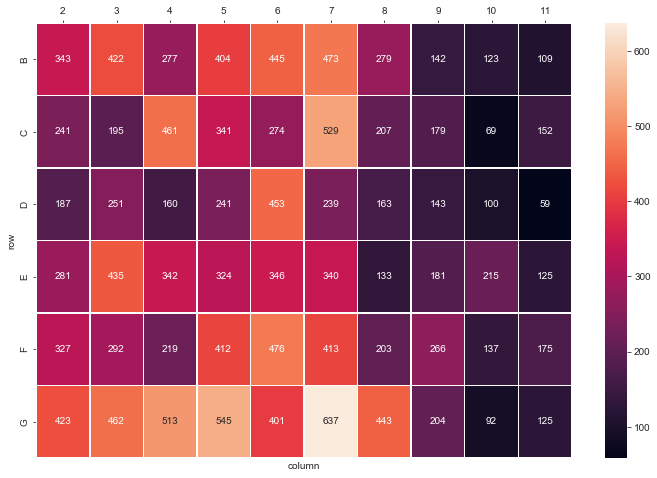

In [60]:
cell_in_well = df.groupby(["row", "column"])["AntiBodyType"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [62]:
order = ['Control', 'DMSO', 
         'Lyco Low', 'Lyco Medium', 'Lyco High'
        ]

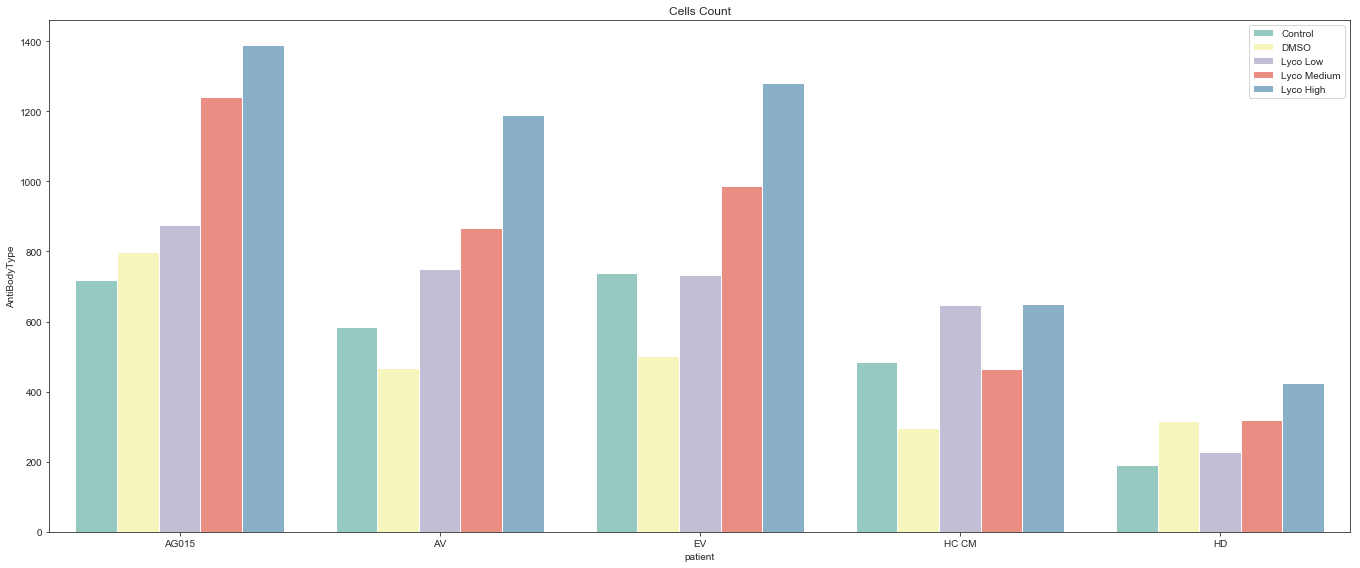

In [61]:
g = df.groupby(['patient', 'Compound'])["AntiBodyType"].count().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="AntiBodyType", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


**Questions:**  
* Are the increasing dose effect of Lycopene mitogenic?
* The medium is serum free?
* NRF2 proliferation effect? Oncogenic effect?
* DMSO concentrations equals the Lyco High?
* Seeding double amount of HD?

**TODO:**
* Bring the cells to confluency and facs analysis to validate Oncogenic effect
* Change plate layout and verify proliferation effect

# Analyzing the features

In [63]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="patient", y="Cyto_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

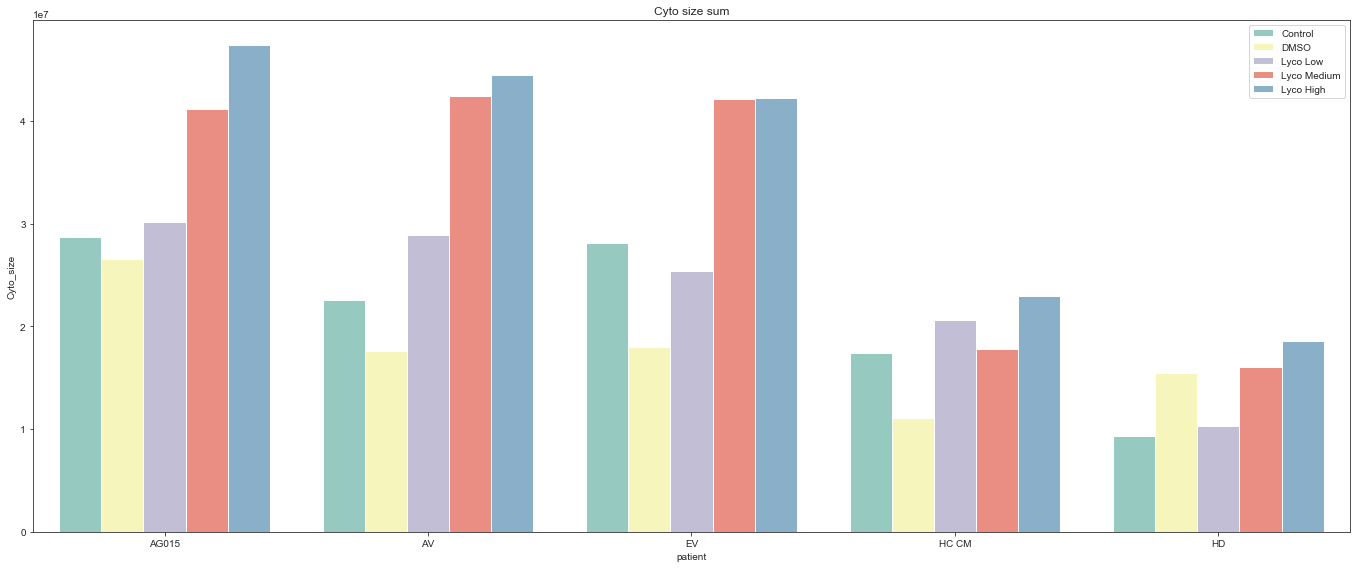

In [64]:
g = df.groupby(['patient', 'Compound'])["Cyto_size"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="Cyto_size", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto size sum")
ax.legend(loc = 1)
plt.tight_layout()


In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_avg", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

* Why DMSO created this effect? 
* Cox17 seems weird?
* Search anomalies and look at the photos

In [79]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_q90", hue="Compound",  data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title("Intesity q90 "+abType)
plt.tight_layout()

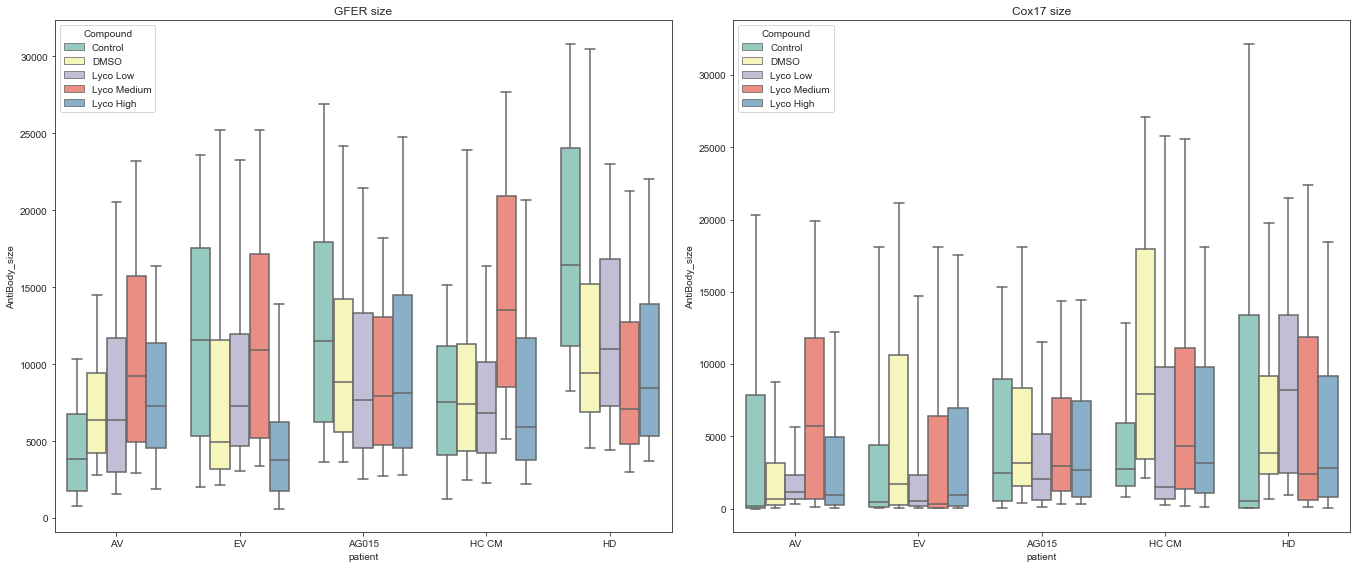

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(f"{abType} size")
plt.tight_layout()

**TODO:**  
* Do Cox17 significance tests

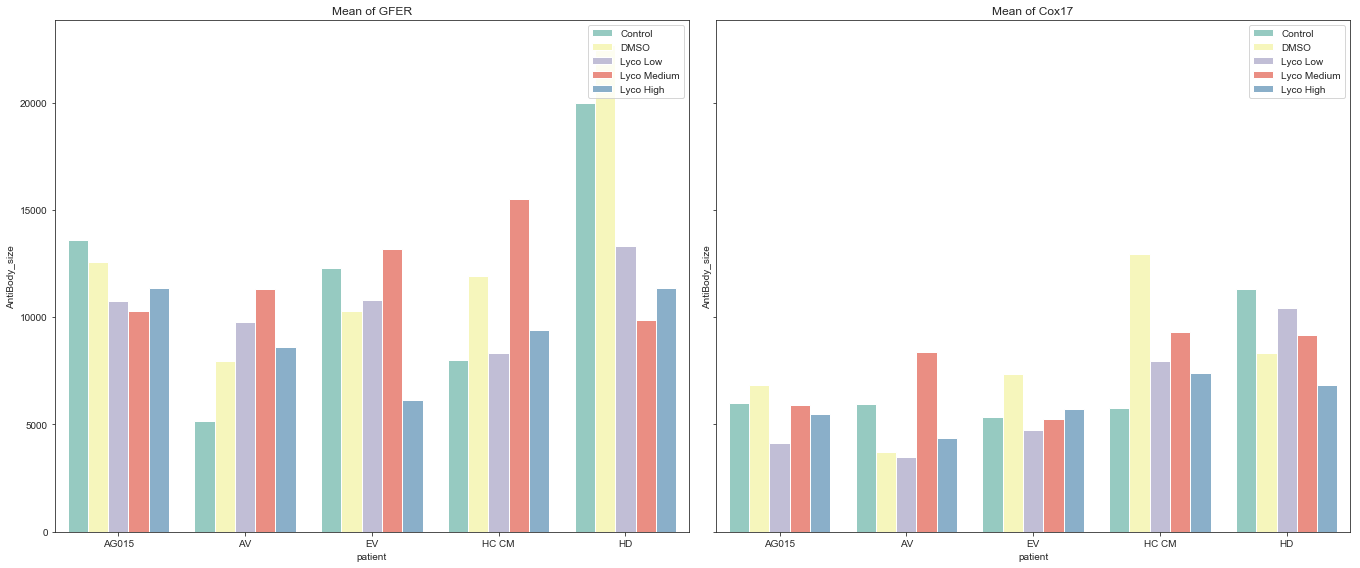

In [107]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)["AntiBody_size"].mean()


sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="AntiBody_size", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title("Mean of "+abType)
    ax[i].legend(loc = 1)
plt.tight_layout()

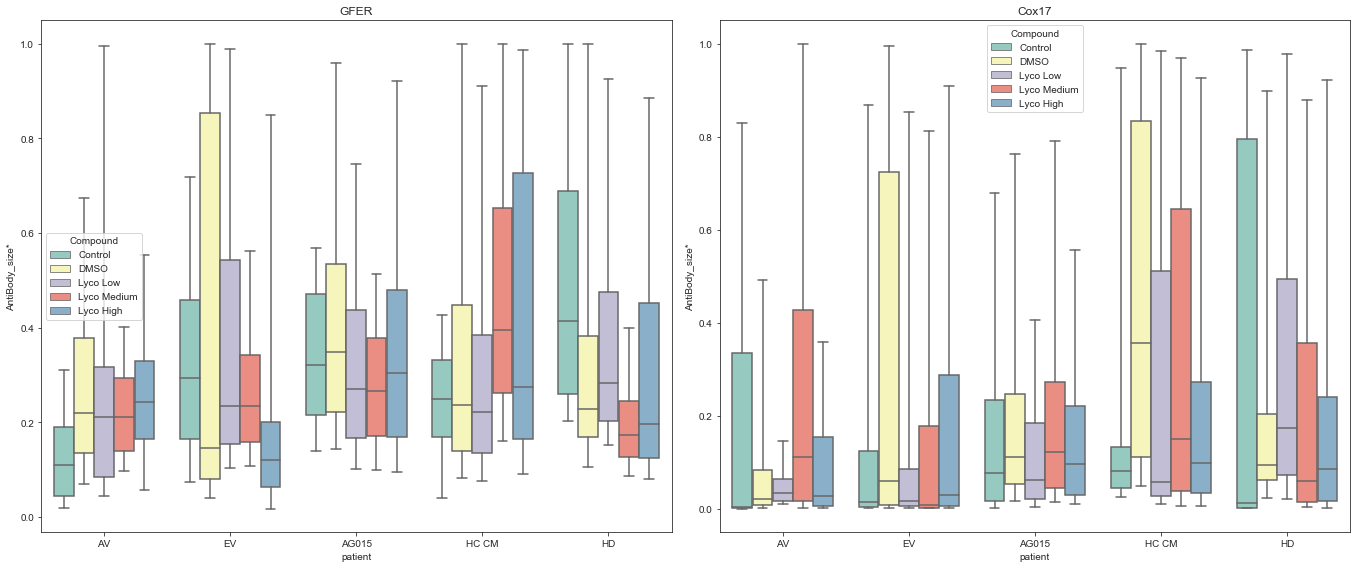

In [68]:
df['AntiBody_size*'] = df['AntiBody_size']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size*", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

In [69]:
df['AntiBody_size**'] = df['AntiBody_size']/df['MitoTracker_size_sum']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size**", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType+" size**")
plt.tight_layout()

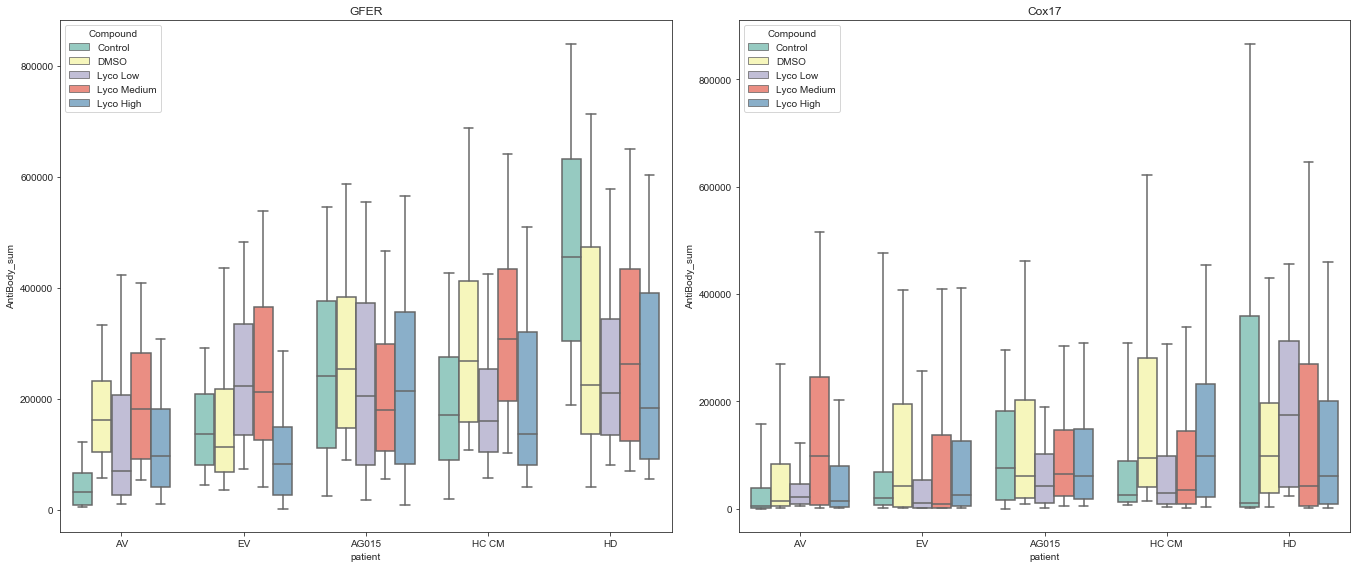

In [71]:
# AntiBody IxA
df['AntiBody_sum'] = df['AntiBody_avg']*df['AntiBody_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_sum", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

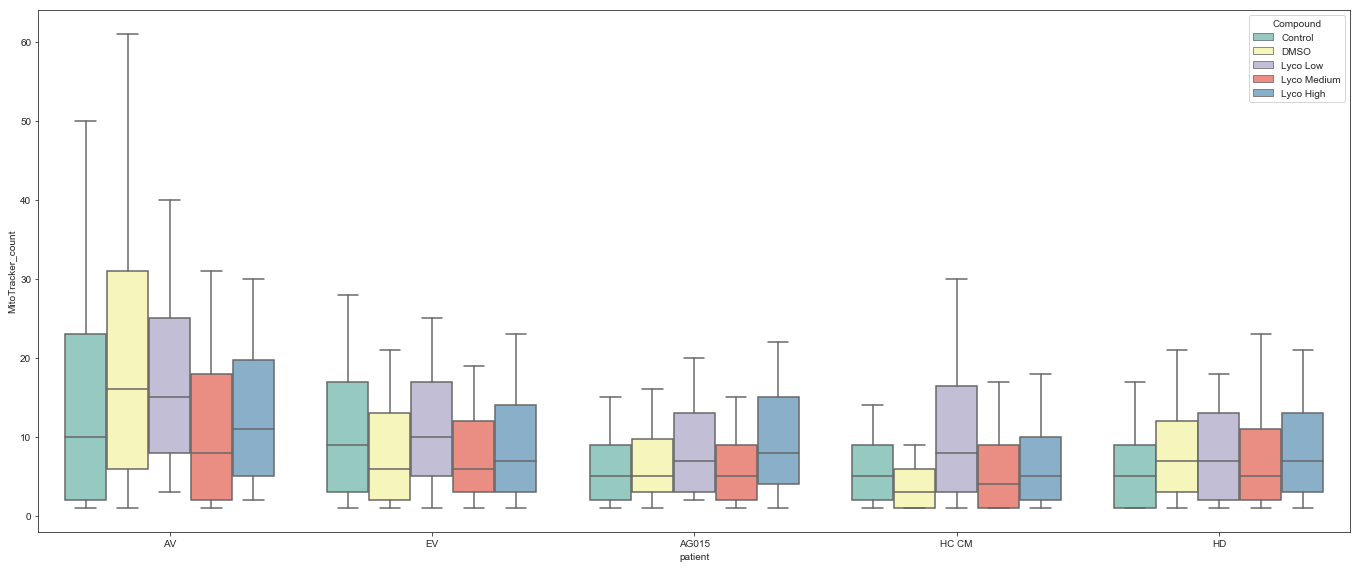

In [108]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_count", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

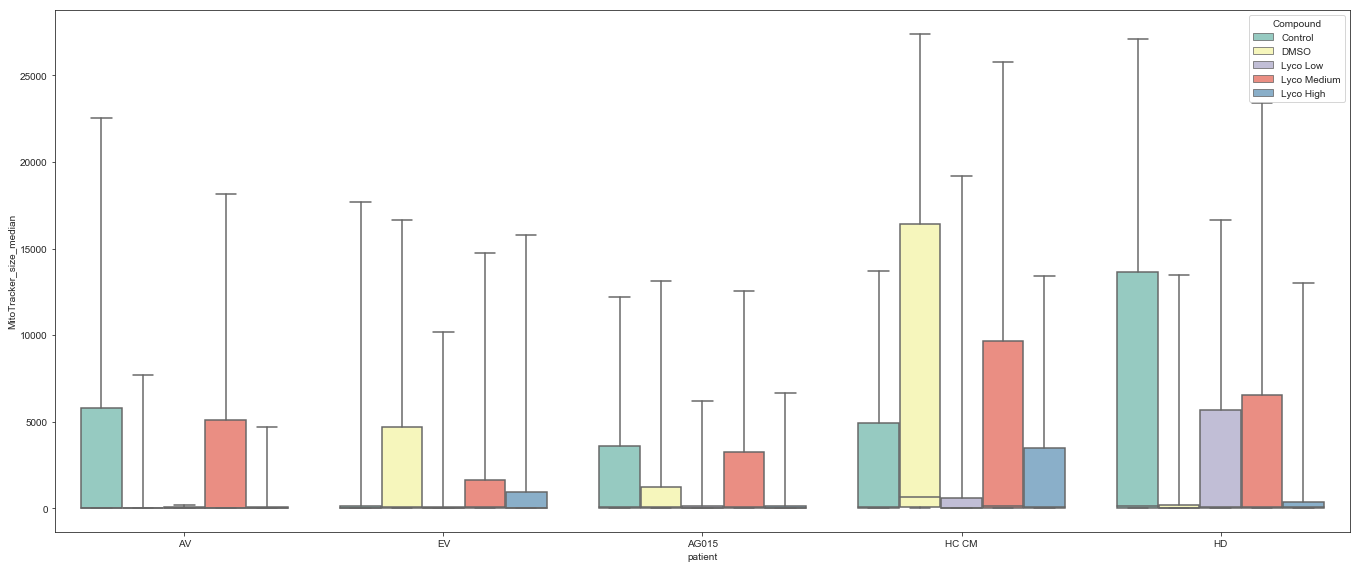

In [72]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_median", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

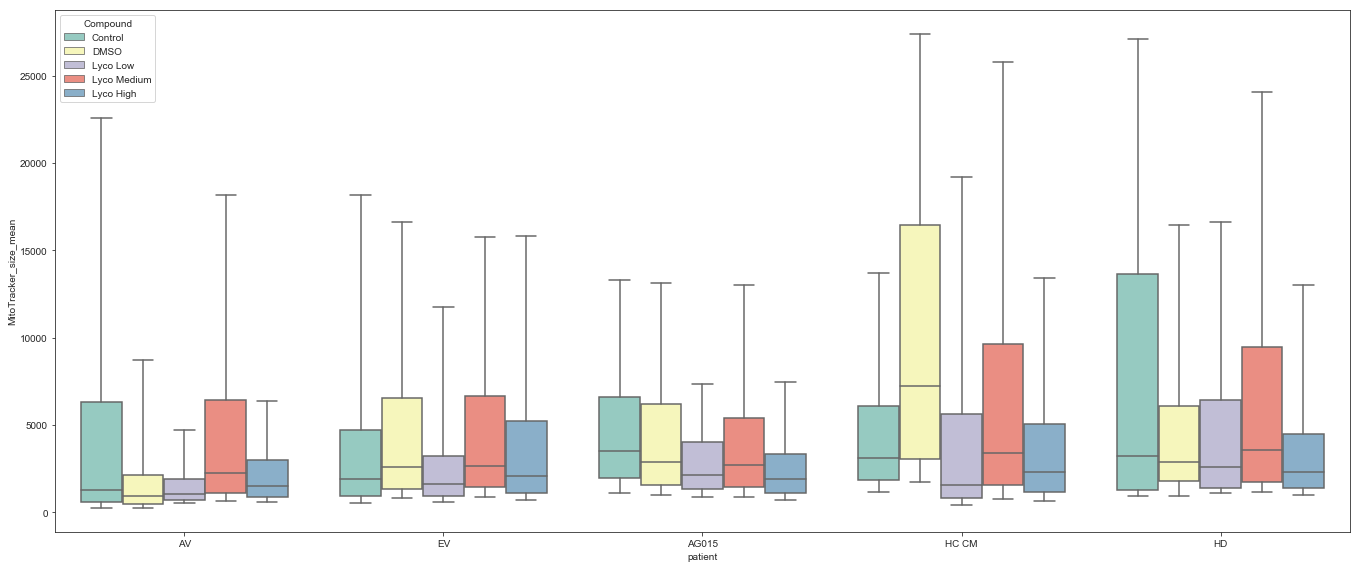

In [84]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_mean", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

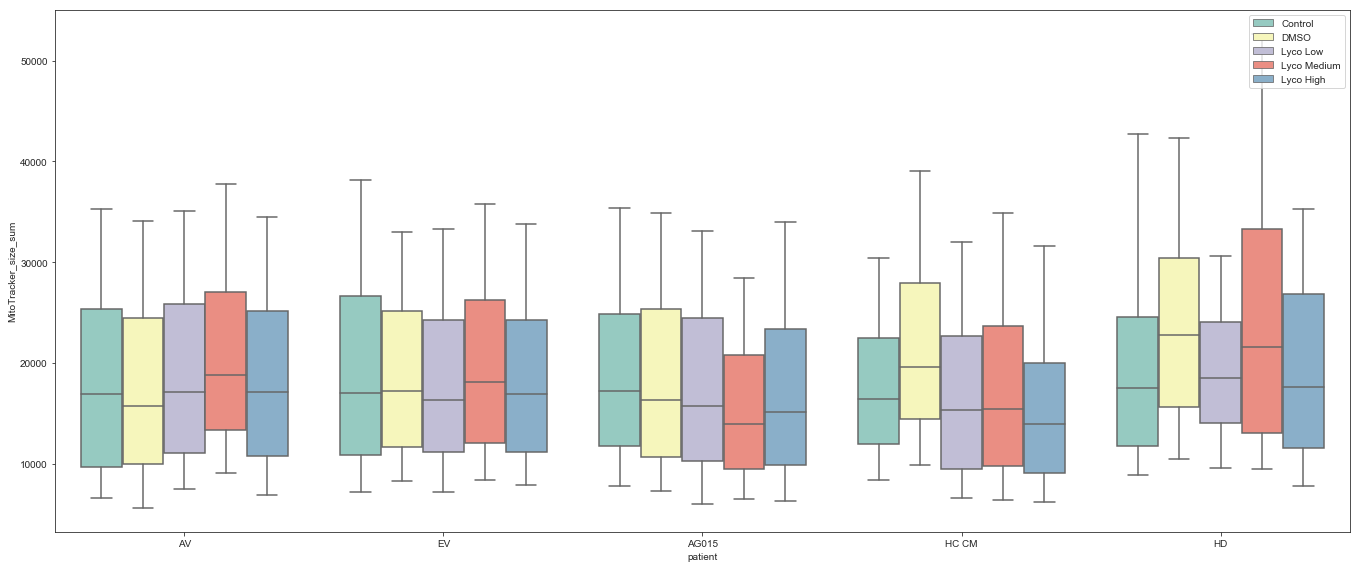

In [73]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.legend(loc=1)
plt.tight_layout()

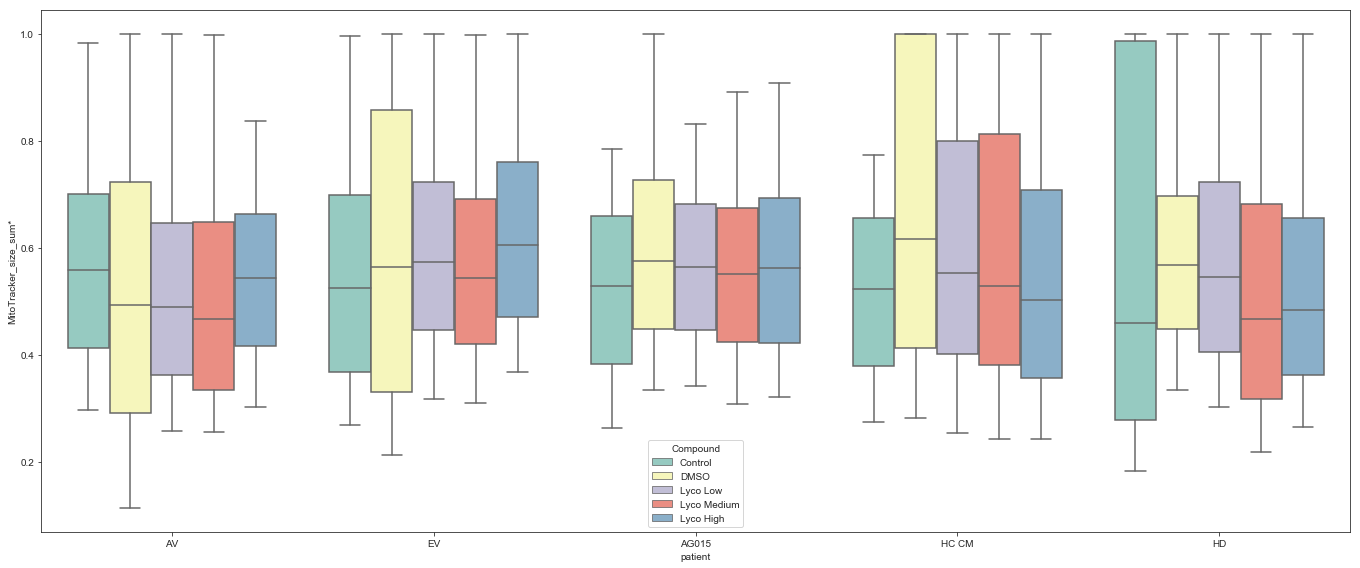

In [74]:
df['MitoTracker_size_sum*'] = df['MitoTracker_size_sum']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_sum*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

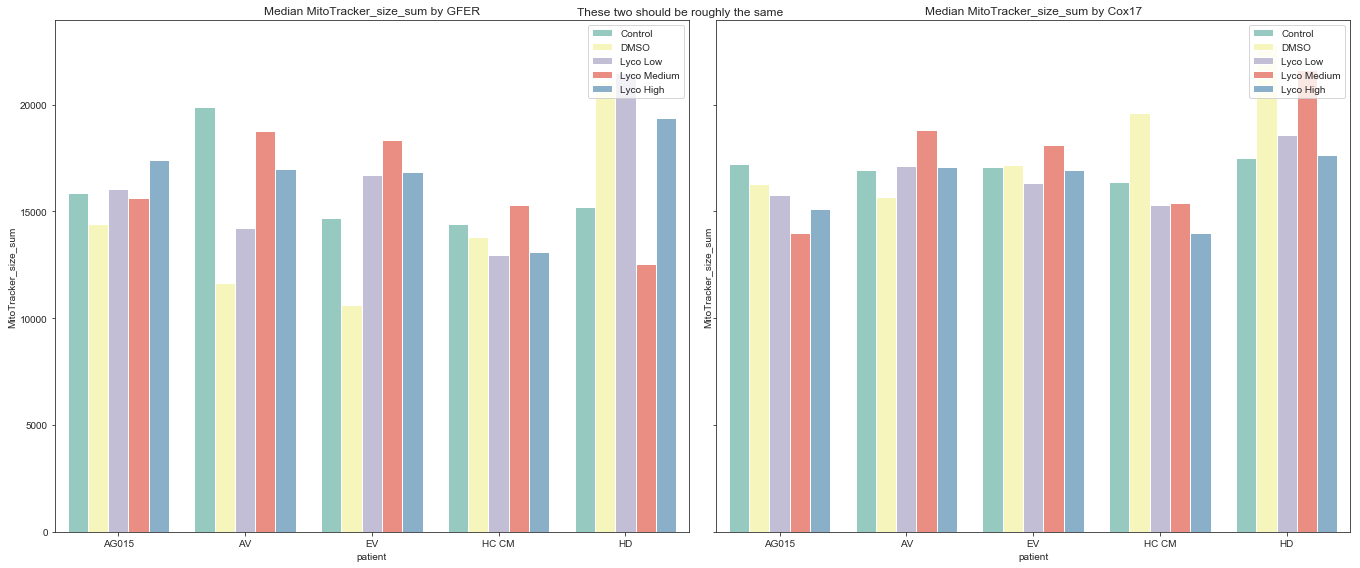

In [116]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)["MitoTracker_size_sum"].median()


sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title("Median MitoTracker_size_sum by "+abType)
    ax[i].legend(loc = 1)
plt.tight_layout()
plt.suptitle("These two should be roughly the same");

These two graphs should had looked the same?

I believe there are too few samples. Maybe we should use 384 plate?

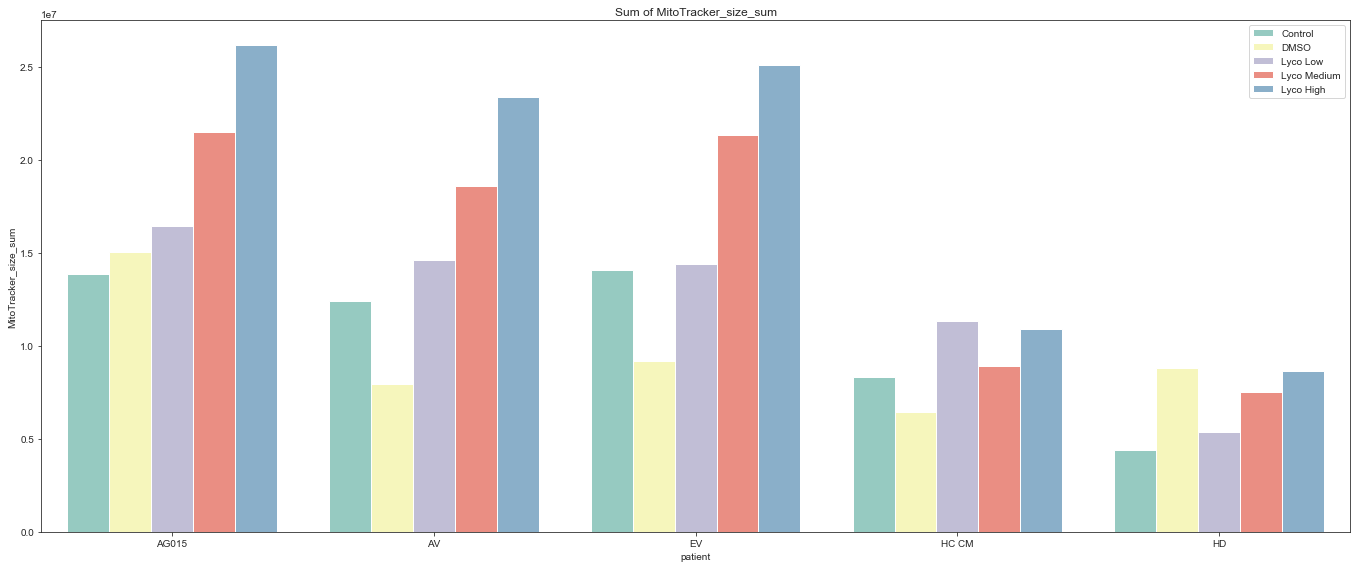

In [89]:
g=df.groupby(['patient' , 'Compound'], as_index=False)["MitoTracker_size_sum"].sum()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=False)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Sum of MitoTracker_size_sum")
ax.legend(loc = 1)
plt.tight_layout()

In [75]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_count", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.legend(loc=1)
plt.tight_layout()

In [99]:

g

AntiBodyType patient     Compound  AntiBody_in_MitoTracker_size  MitoTracker_size_sum  AntiBody_in_MitoTracker_size_ratio
0         Cox17   AG015      Control                     1506314.0             5520293.0                            0.272868
1         Cox17   AG015         DMSO                     2184728.0             6613389.0                            0.330349
2         Cox17   AG015    Lyco High                     5422576.0            19224052.0                            0.282072
3         Cox17   AG015     Lyco Low                     1478624.0             7360165.0                            0.200895
4         Cox17   AG015  Lyco Medium                     4171171.0            12914098.0                            0.322994
..          ...     ...          ...                           ...                   ...                                 ...
45         GFER      HD      Control                     2127522.0             2769669.0                            0.768150
46         GFER      HD         DMSO                     2238412.0             3478836.0                            0.643437
47         GFER      HD    Lyco High                     1330075.0             2550025.0                            0.521593
48         GFER      HD     Lyco Low                     1758807.0             3456164.0                            0.508890
49         GFER      HD  Lyco Medium                      974455.0             1832421.0                            0.531786

[50 rows x 6 columns]

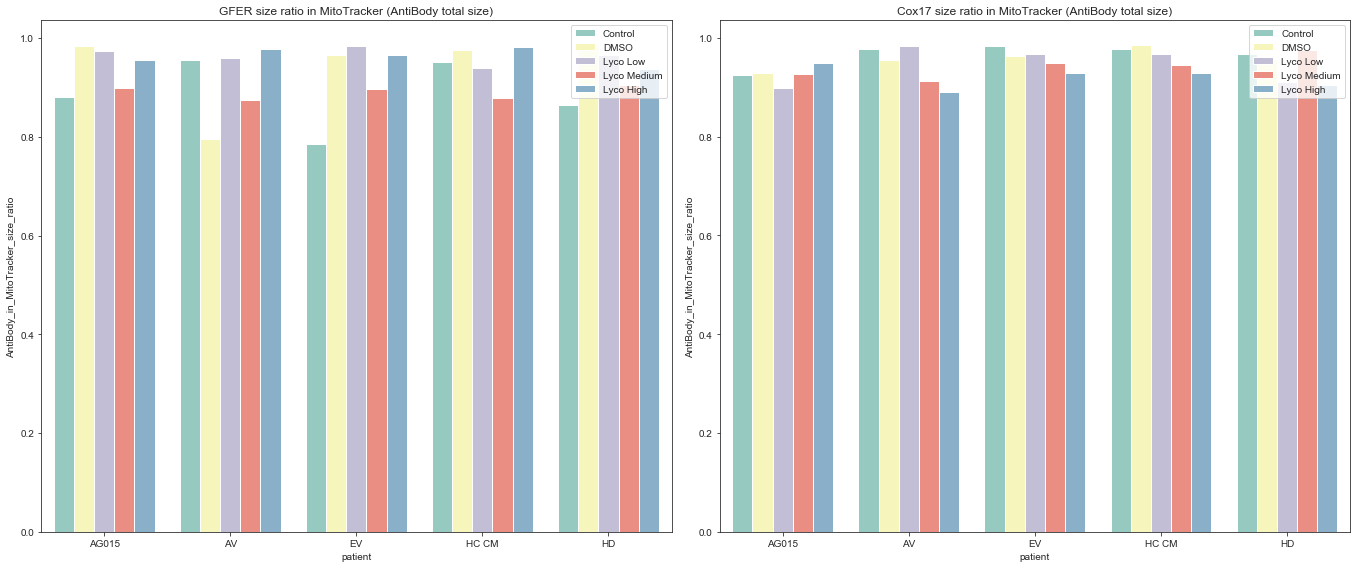

In [105]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)[["AntiBody_in_MitoTracker_size", "AntiBody_size"]].sum()
g["AntiBody_in_MitoTracker_size_ratio"] = g["AntiBody_in_MitoTracker_size"]/g["AntiBody_size"]

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="AntiBody_in_MitoTracker_size_ratio", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title(abType + " size ratio in MitoTracker (AntiBody total size)")
    ax[i].legend(loc = 1)
plt.tight_layout()

In [83]:
df.columns.tolist()

['Actin_avg',
 'Actin_max',
 'Actin_q10',
 'Actin_q50',
 'Actin_q90',
 'Actin_size',
 'Actin_std',
 'Actin_sum',
 'Cyto_area',
 'Cyto_aspect_ratio',
 'Cyto_avg',
 'Cyto_circularity_size_ratio',
 'Cyto_cx',
 'Cyto_cy',
 'Cyto_extent',
 'Cyto_h',
 'Cyto_max',
 'Cyto_min_enclosing_circle_area',
 'Cyto_perimeter',
 'Cyto_q10',
 'Cyto_q50',
 'Cyto_q90',
 'Cyto_rect_area',
 'Cyto_size',
 'Cyto_solidity',
 'Cyto_std',
 'Cyto_sum',
 'Cyto_w',
 'AntiBody_avg',
 'AntiBody_in_MitoTracker_avg',
 'AntiBody_in_MitoTracker_max',
 'AntiBody_in_MitoTracker_q10',
 'AntiBody_in_MitoTracker_q50',
 'AntiBody_in_MitoTracker_q90',
 'AntiBody_in_MitoTracker_size',
 'AntiBody_in_MitoTracker_std',
 'AntiBody_in_Nucli_avg',
 'AntiBody_in_Nucli_max',
 'AntiBody_in_Nucli_q10',
 'AntiBody_in_Nucli_q50',
 'AntiBody_in_Nucli_q90',
 'AntiBody_in_Nucli_size',
 'AntiBody_in_Nucli_std',
 'AntiBody_max',
 'AntiBody_outside_MitoTracker_avg',
 'AntiBody_outside_MitoTracker_max',
 'AntiBody_outside_MitoTracker_q10',
 'AntiBo